Simulating with current I=0 pA
Simulating with current I=20 pA
Simulating with current I=40 pA
Simulating with current I=60 pA
Simulating with current I=80 pA
Simulating with current I=100 pA
Simulating with current I=120 pA
Simulating with current I=140 pA
Simulating with current I=160 pA
Simulating with current I=180 pA
Simulating with current I=200 pA
Simulating with current I=220 pA
Simulating with current I=240 pA
Simulating with current I=260 pA
Simulating with current I=280 pA
Simulating with current I=300 pA
Simulating with current I=320 pA
Simulating with current I=340 pA
Simulating with current I=360 pA
Simulating with current I=380 pA
Simulating with current I=400 pA
Simulating with current I=420 pA
Simulating with current I=440 pA
Simulating with current I=460 pA
Simulating with current I=480 pA
Simulating with current I=500 pA
Simulating with current I=520 pA
Simulating with current I=540 pA
Simulating with current I=560 pA
Simulating with current I=580 pA
Simulating with 

Simulating with current I=5000 pA
Simulating with current I=5020 pA
Simulating with current I=5040 pA
Simulating with current I=5060 pA
Simulating with current I=5080 pA
Simulating with current I=5100 pA
Simulating with current I=5120 pA
Simulating with current I=5140 pA
Simulating with current I=5160 pA
Simulating with current I=5180 pA
Simulating with current I=5200 pA
Simulating with current I=5220 pA
Simulating with current I=5240 pA
Simulating with current I=5260 pA
Simulating with current I=5280 pA
Simulating with current I=5300 pA
Simulating with current I=5320 pA
Simulating with current I=5340 pA
Simulating with current I=5360 pA
Simulating with current I=5380 pA
Simulating with current I=5400 pA
Simulating with current I=5420 pA
Simulating with current I=5440 pA
Simulating with current I=5460 pA
Simulating with current I=5480 pA
Simulating with current I=5500 pA
Simulating with current I=5520 pA
Simulating with current I=5540 pA
Simulating with current I=5560 pA
Simulating wit

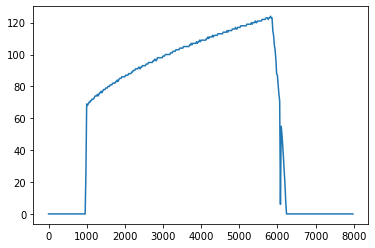

In [5]:
import nest
import numpy as np
import matplotlib.pyplot as plt

nest.set_verbosity('M_WARNING')
nest.ResetKernel()

simtime = 1000

# Amplitude range, in pA
dcfrom = 0
dcstep = 20
dcto = 8000

h = 0.1  # simulation step size in mS

neuron = nest.Create('hh_psc_alpha')
sr = nest.Create('spike_recorder')

sr.record_to = 'memory'

nest.Connect(neuron, sr, syn_spec={'weight': 1.0, 'delay': h})

# Simulation loop
n_data = int(dcto / float(dcstep))
amplitudes = np.zeros(n_data)
event_freqs = np.zeros(n_data)
for i, amp in enumerate(range(dcfrom, dcto, dcstep)):
    neuron.I_e = float(amp)
    print(f"Simulating with current I={amp} pA")
    nest.Simulate(1000)  # one second warm-up time for equilibrium state
    sr.n_events = 0  # then reset spike counts
    nest.Simulate(simtime)  # another simulation call to record firing rate

    n_events = sr.n_events
    amplitudes[i] = amp
    event_freqs[i] = n_events / (simtime / 1000.)

plt.plot(amplitudes, event_freqs)
plt.show()